# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import pickle

# Tabular data

## Load data

In [2]:
# Load the Excel file
df = pd.read_csv('houses_preprocessed.csv')['price']
df.head()

0    228500
1    273950
2    350000
3    385100
4    350000
Name: price, dtype: int64

## Plotting

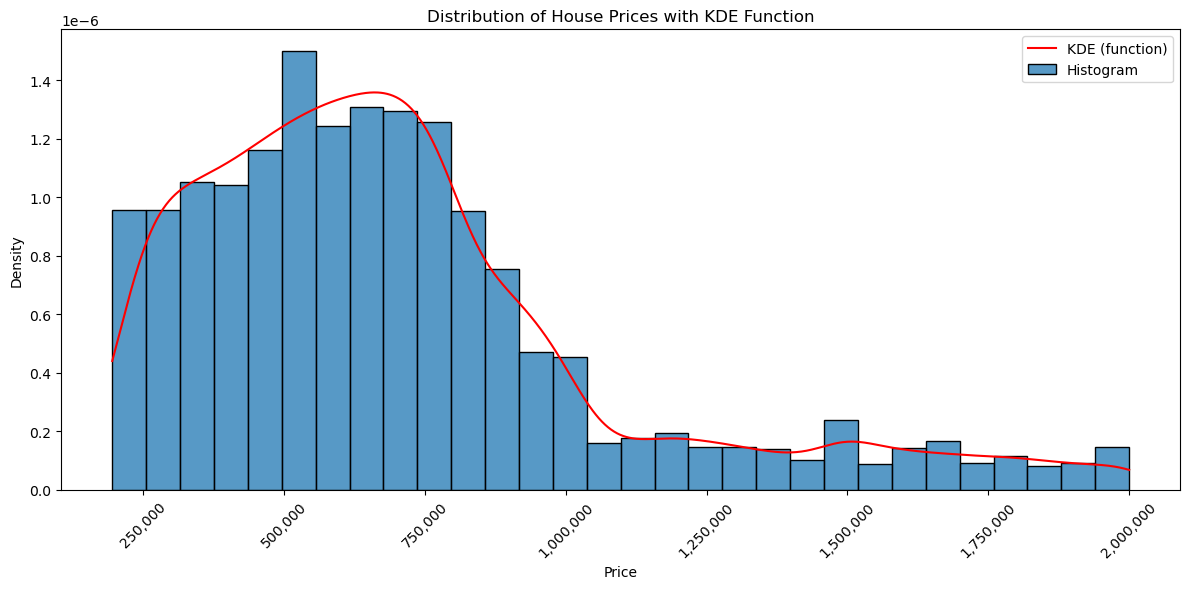

In [3]:
# Compute KDE as a function
kde_func = gaussian_kde(df)

# Example: Evaluate KDE at specific price points
x_vals = np.linspace(df.min(), df.max(), 1000)
y_vals = kde_func(x_vals)

# Plot histogram + KDE manually
plt.figure(figsize=(12, 6))
sns.histplot(df, bins=30, stat="density", edgecolor="black", label='Histogram')
plt.plot(x_vals, y_vals, color='red', label='KDE (function)')
plt.title('Distribution of House Prices with KDE Function')
plt.xlabel('Price')
plt.ylabel('Density')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Function

In [4]:
# Sample 10,000 synthetic house prices from the KDE
# Returns a 2D array, so we grab the 1D part
samples = kde_func.resample(10000)[0]  

### Plot 10k samples

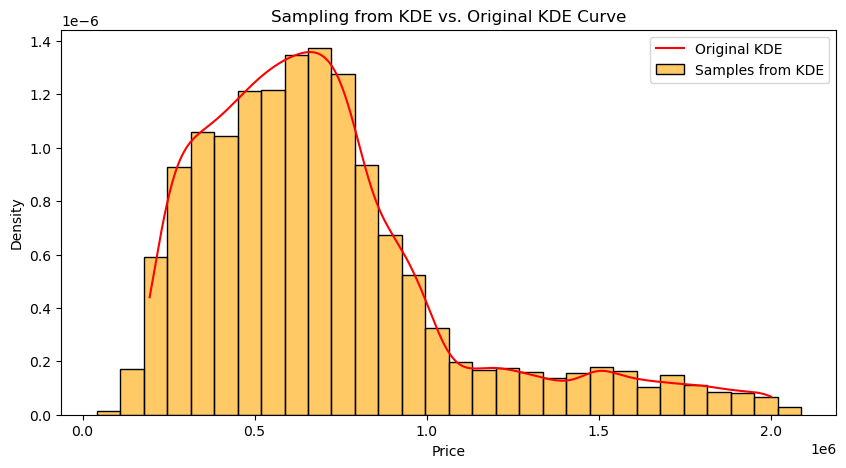

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(samples, bins=30, stat="density", color='orange', label='Samples from KDE', alpha=0.6)
plt.plot(x_vals, y_vals, color='red', label='Original KDE')
plt.title("Sampling from KDE vs. Original KDE Curve")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

### Save function

In [6]:
with open('kde_price_function.pkl', 'wb') as f:
    pickle.dump(kde_func, f)

### Usage

In [7]:
# Load the KDE function from the file
with open('kde_price_function.pkl', 'rb') as f:
    kde_loaded = pickle.load(f)

# Sample a random price from the house price distribution (population)
sampled_price = int(kde_loaded.resample(1)[0][0])

# Create prompt with the sampled price
current_prompt = f'''Generate an image of a house where the value of the house is ${sampled_price}.'''
current_prompt

'Generate an image of a house where the value of the house is $389712.'